In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sales-dataset/Bike Sales Dashboard.xlsx
/kaggle/input/bike-buyer/Bike.xlsx


In [2]:
df = pd.read_excel('/kaggle/input/bike-buyer/Bike.xlsx')

In [3]:
df.head()

,ID,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes


In [4]:
df.shape

(1000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   int64 
 1   Martial Status    1000 non-null   object
 2   Gender            1000 non-null   object
 3   Income            1000 non-null   int64 
 4   Children          1000 non-null   int64 
 5   Education         1000 non-null   object
 6   Occupation        1000 non-null   object
 7   Home Owner        1000 non-null   object
 8   Cars              1000 non-null   int64 
 9   Commute Distance  1000 non-null   object
 10  Region            1000 non-null   object
 11  Age               1000 non-null   int64 
 12  Age Brackets      1000 non-null   object
 13  Purchased Bike    1000 non-null   object
dtypes: int64(5), object(9)
memory usage: 109.5+ KB


In [6]:
df.isnull().sum()

ID                  0
Martial Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Age Brackets        0
Purchased Bike      0
dtype: int64

In [7]:
df[df.duplicated()]

,ID,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike


In [8]:
# Data Cleaning
df.drop('ID', axis = 1 , inplace =  True)

# Visualization

In [9]:
df_cat = df.select_dtypes(include = ['object']) 

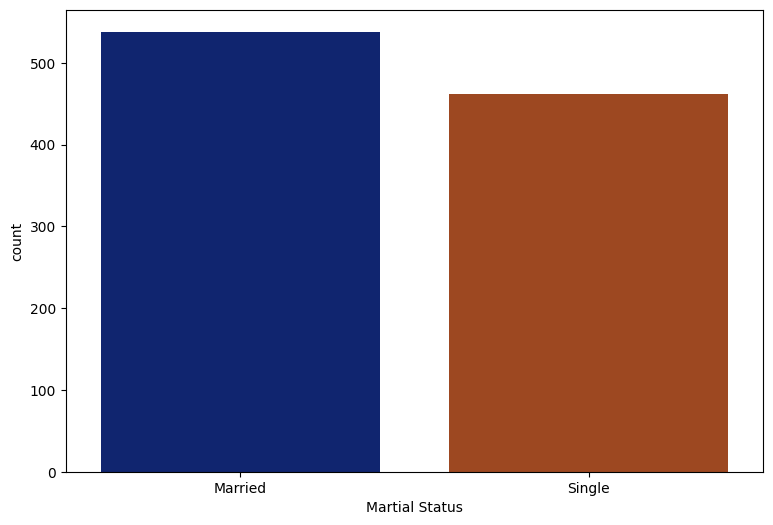

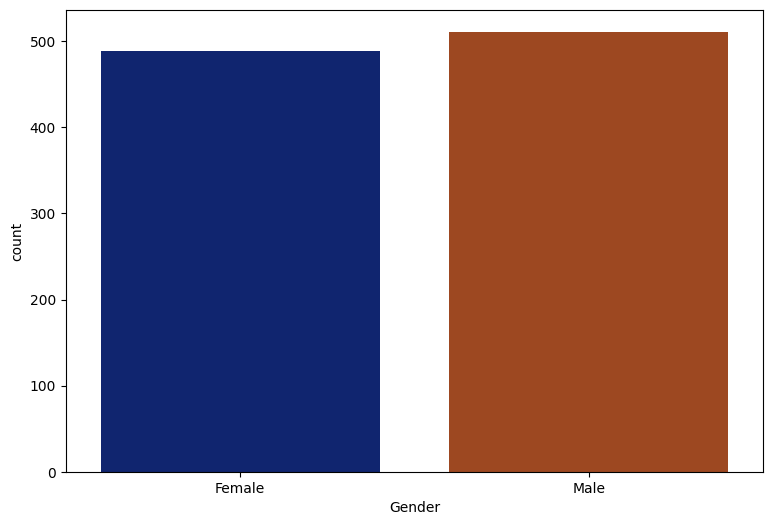

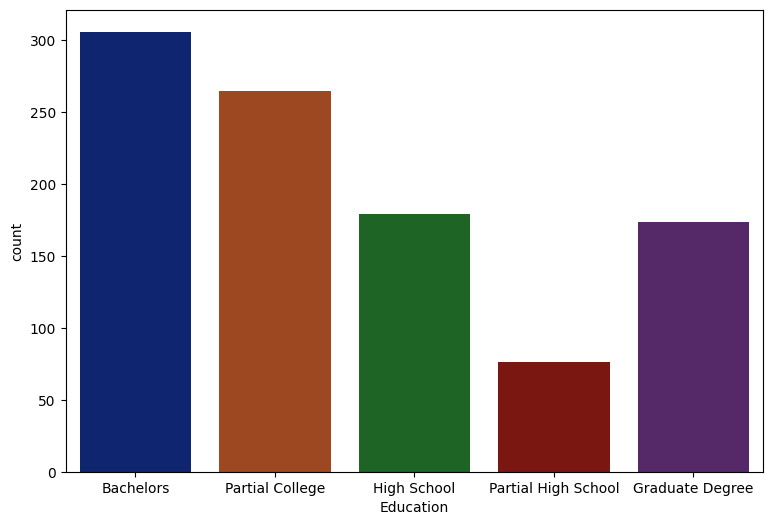

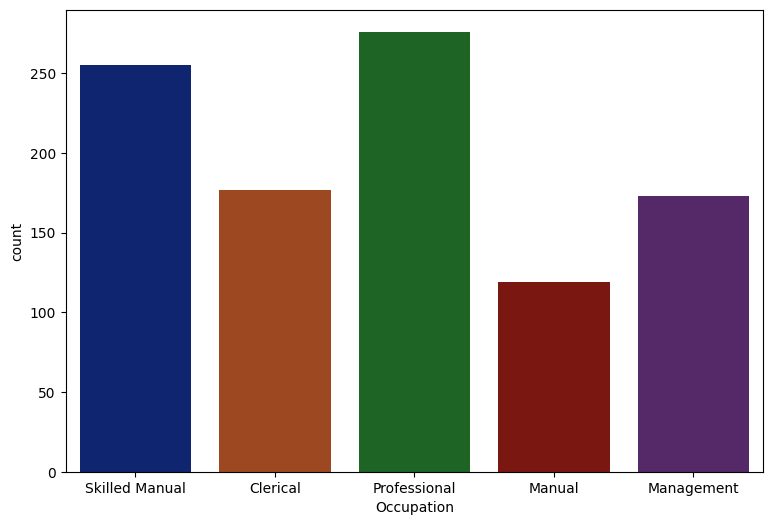

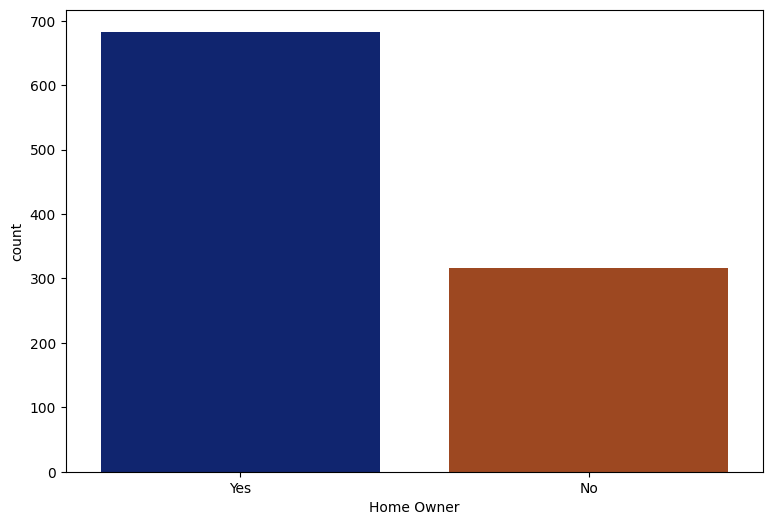

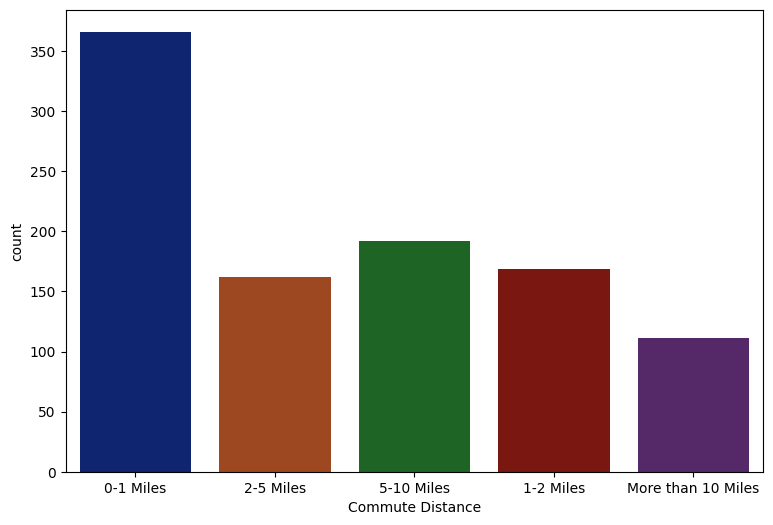

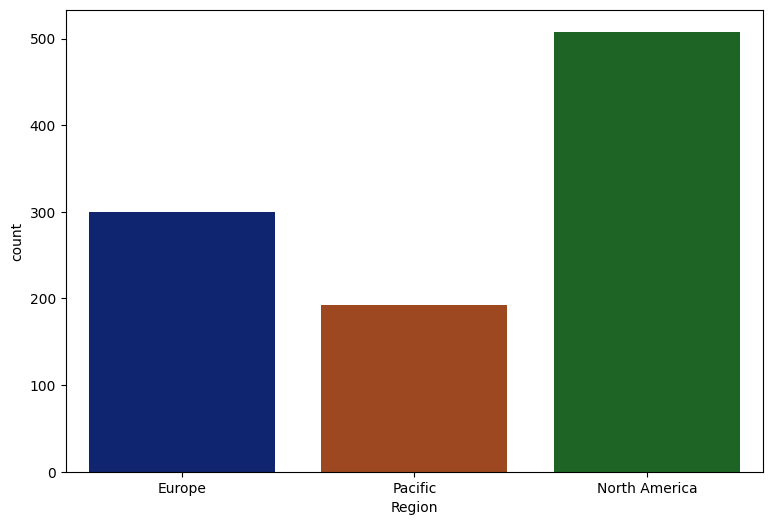

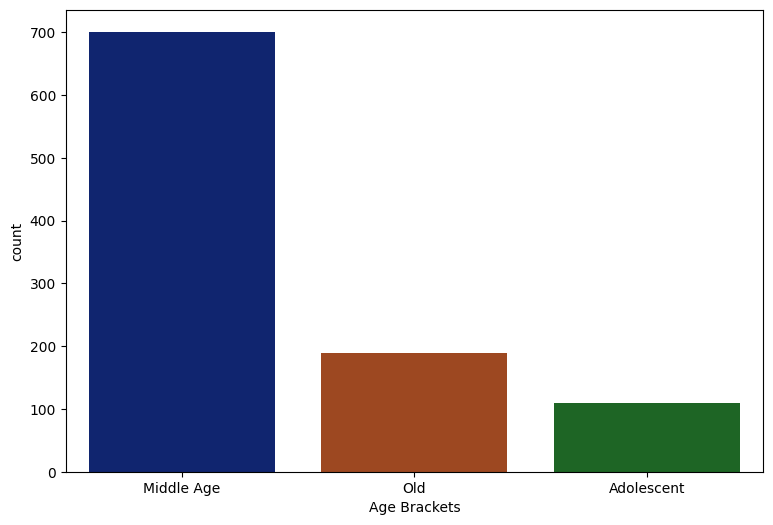

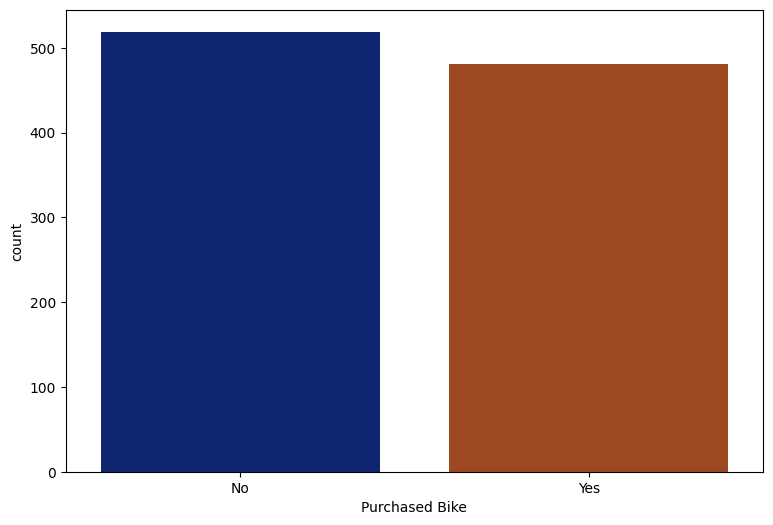

In [10]:
for col in df_cat:
    plt.figure(figsize=(9,6))
    sns.countplot(x = df[col],palette= 'dark')
    plt.show()

In [11]:
df_num = ['Income','Age']

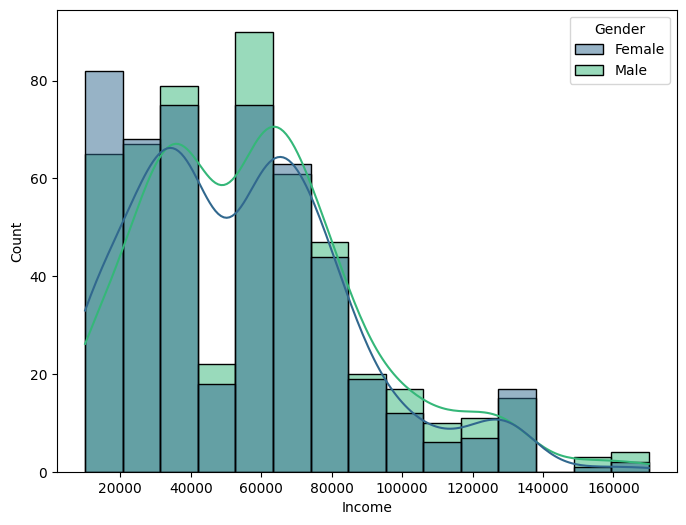

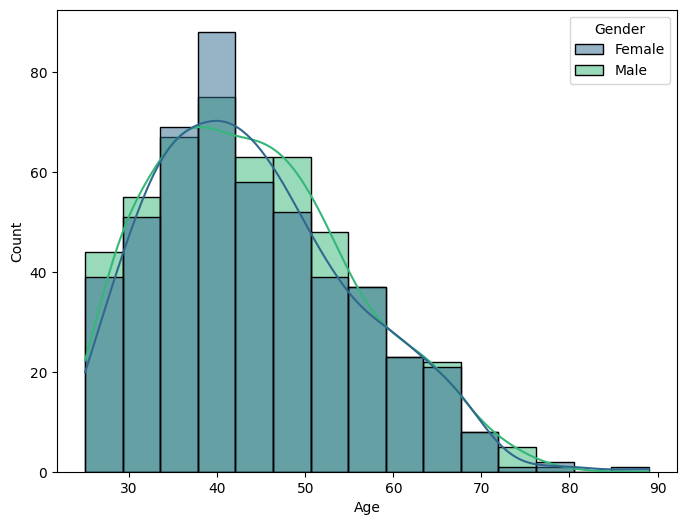

In [12]:
for col in df_num:
    plt.figure(figsize=(8,6))
    sns.histplot(x = col, data = df,bins = 15, kde = True, palette = 'viridis',hue = 'Gender')
    plt.show()

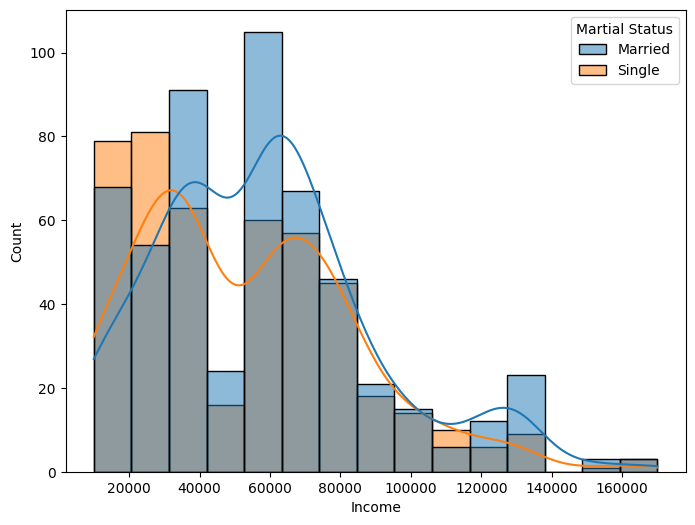

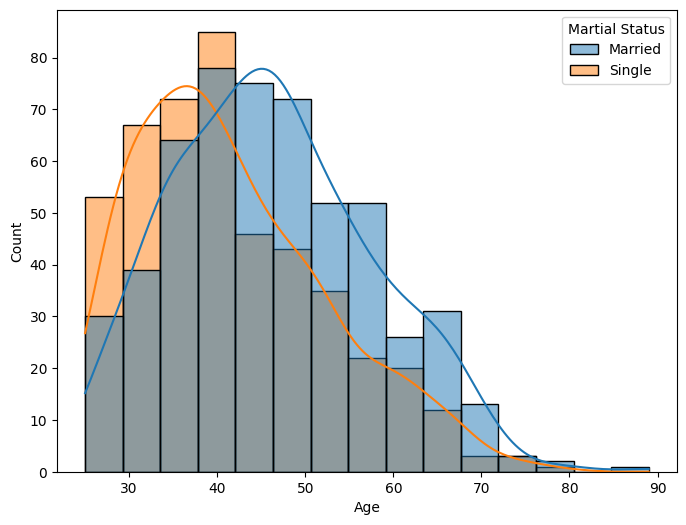

In [13]:
for col in df_num:
    plt.figure(figsize=(8,6))
    sns.histplot(x = col, data = df,bins = 15, kde = True,hue = 'Martial Status')
    plt.show()

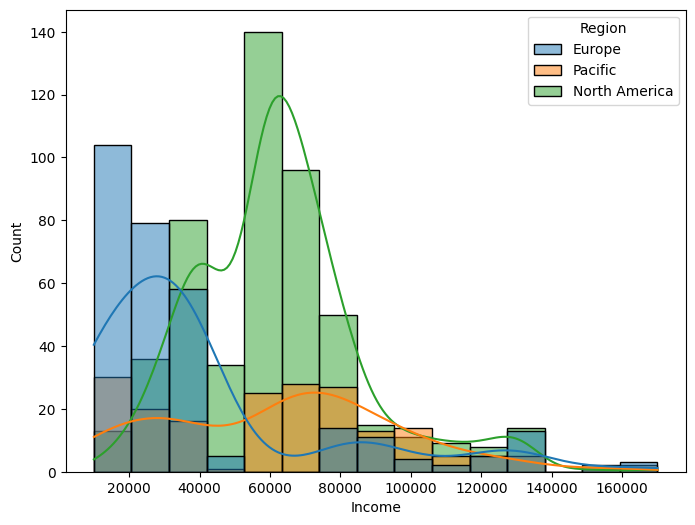

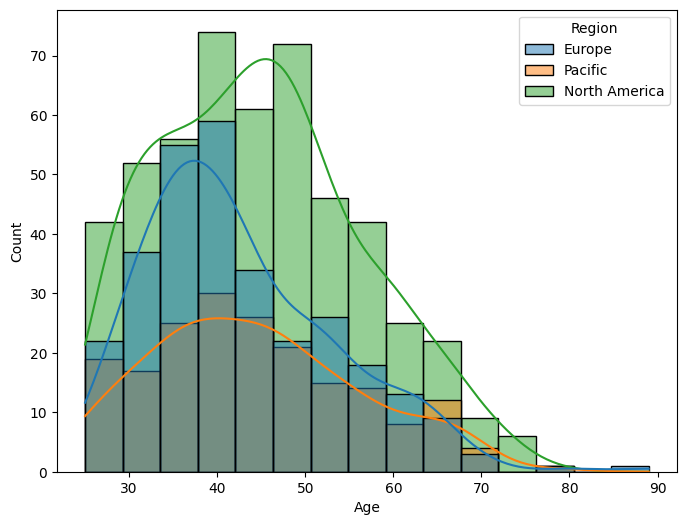

In [14]:
for col in df_num:
    plt.figure(figsize=(8,6))
    sns.histplot(x = col, data = df,bins = 15, kde = True,hue = 'Region')
    plt.show()

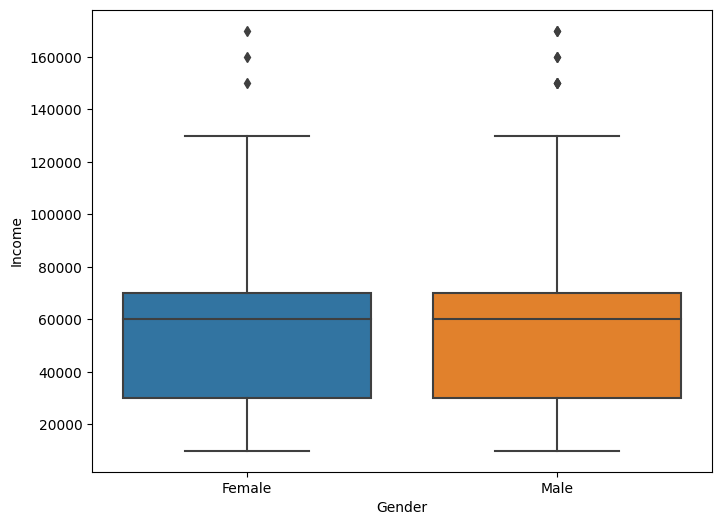

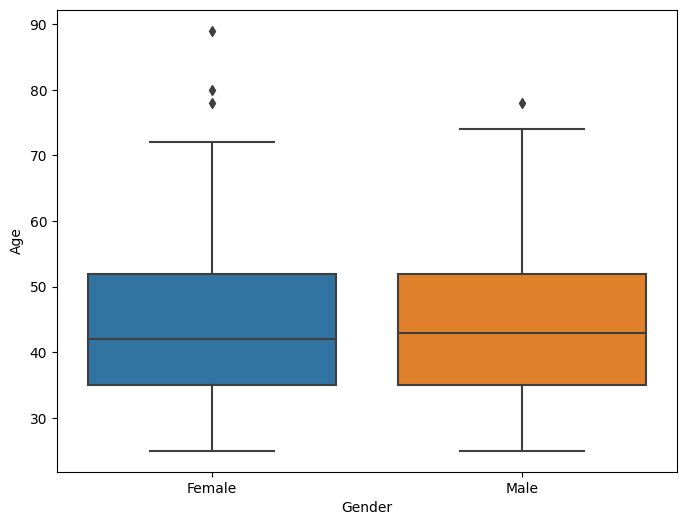

In [15]:
for col in df_num:
    plt.figure(figsize=(8,6))
    sns.boxplot(y = col, data = df,x = 'Gender')
    plt.show()

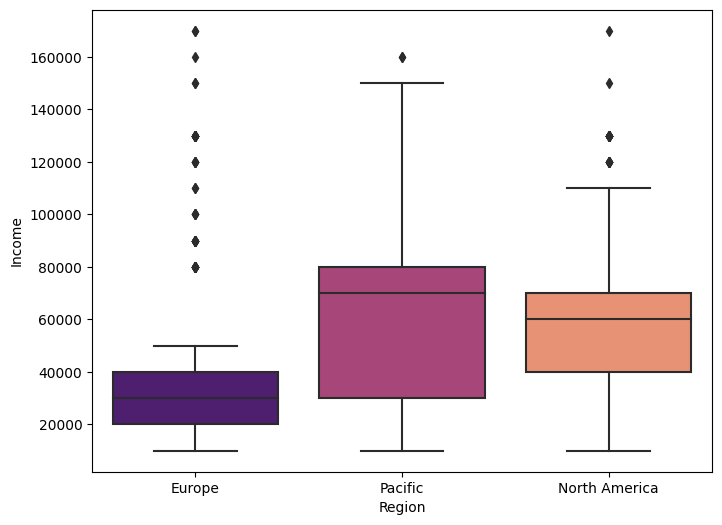

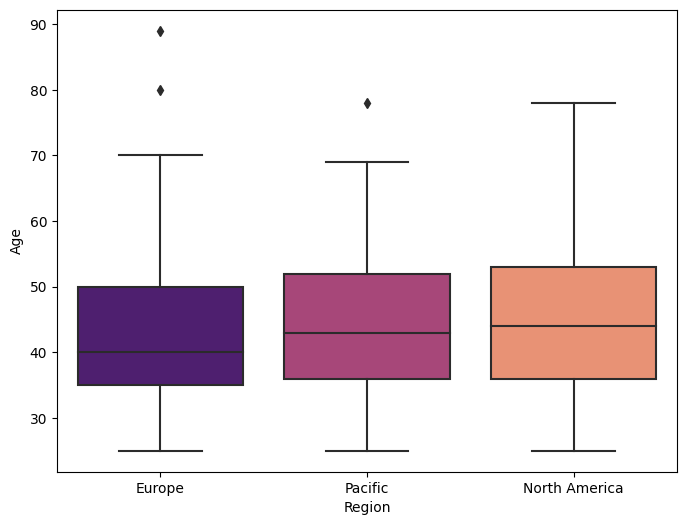

In [16]:
for col in df_num:
    plt.figure(figsize=(8,6))
    sns.boxplot(y = col, data = df,x = 'Region', palette = 'magma')
    plt.show()

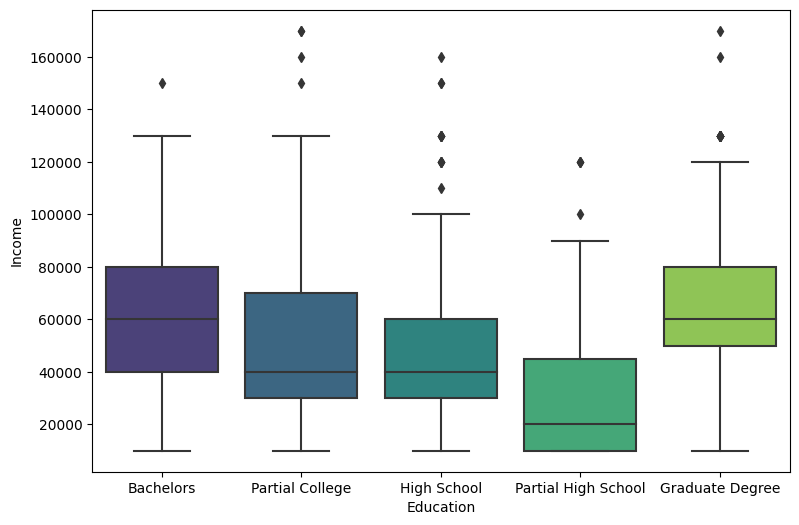

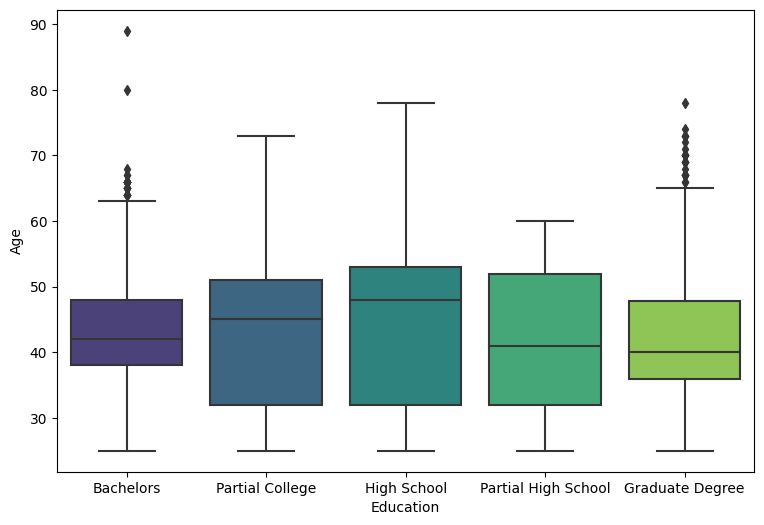

In [17]:
for col in df_num:
    plt.figure(figsize=(9,6))
    sns.boxplot(y = col, data = df,x = 'Education', palette = 'viridis')
    plt.show()

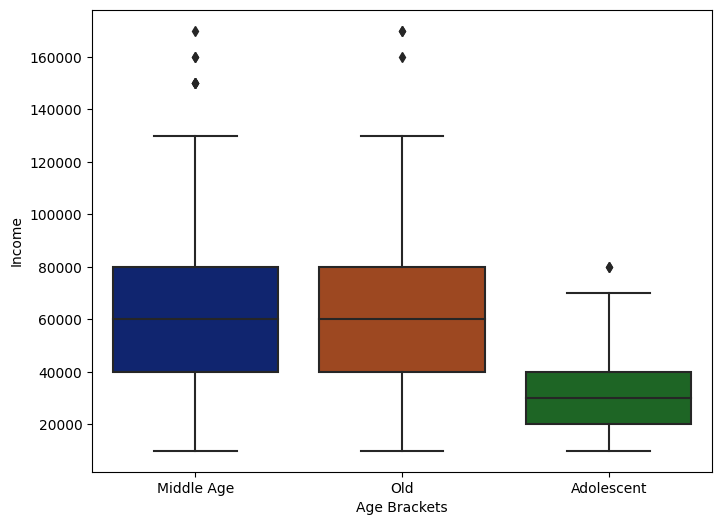

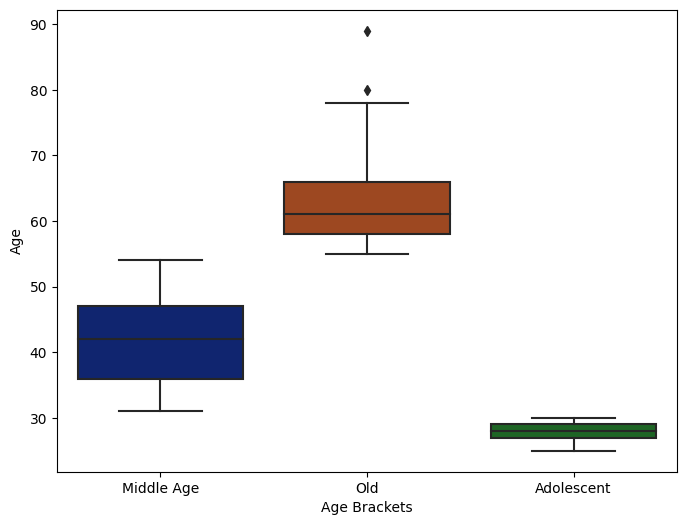

In [18]:
for col in df_num:
    plt.figure(figsize=(8,6))
    sns.boxplot(y = col, data = df,x = 'Age Brackets', palette = 'dark')
    plt.show()

In [19]:
df.columns

Index(['Martial Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Age Brackets', 'Purchased Bike'],
      dtype='object')

In [20]:
df_category = ['Martial Status', 'Gender','Education','Occupation', 'Region', 'Age Brackets']

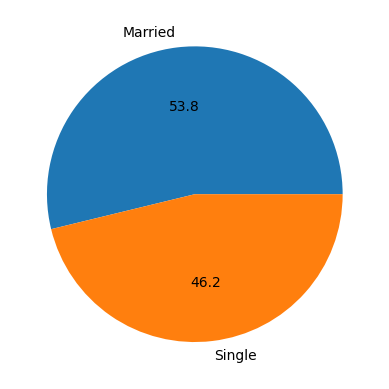

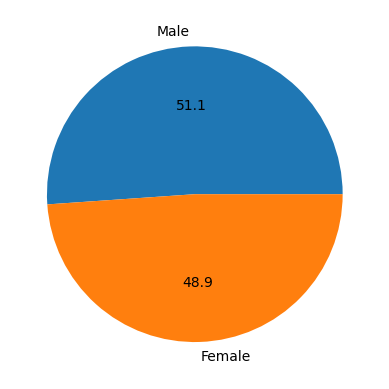

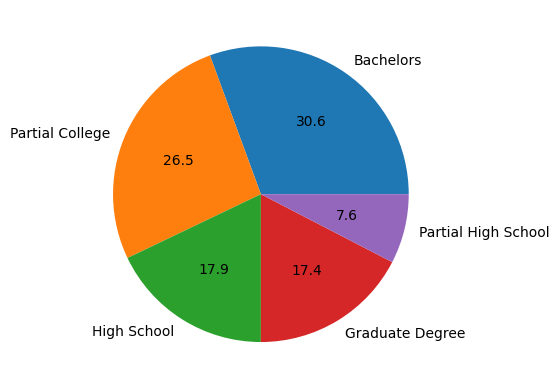

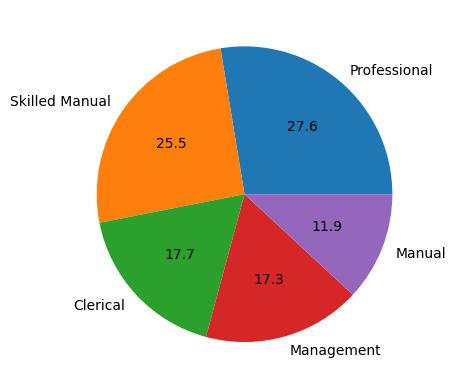

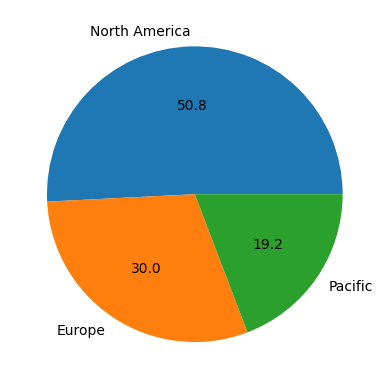

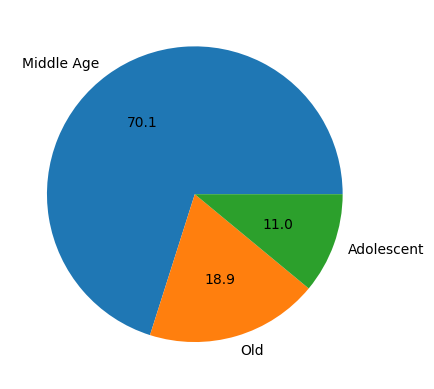

In [21]:
for col in df_category:
    df[col].value_counts().plot(kind = 'pie', autopct = '%.1f')
    plt.ylabel(None)
    plt.show()

In [22]:
df_c = df.select_dtypes(exclude = ['object'])

<Axes: >

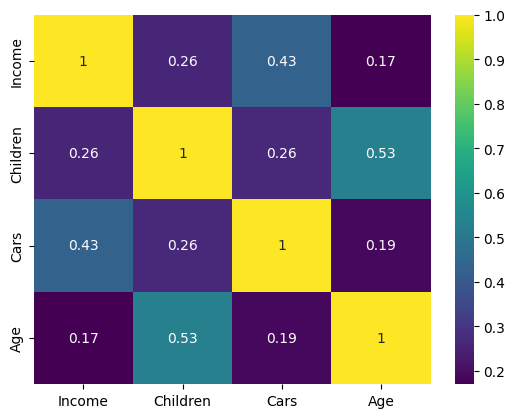

In [23]:
sns.heatmap(df_c.corr(), annot = True, cmap = 'viridis')

In [24]:
df

,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
1,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
2,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No
3,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes
4,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Middle Age,Yes
996,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Middle Age,Yes
997,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Middle Age,Yes
998,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,Middle Age,No


# Data Preprocessing

In [25]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
scale = StandardScaler()

In [26]:
for col in df.select_dtypes(include = ['object']):
    df[col] = le.fit_transform(df[col])

In [27]:
df['Income']  = scale.fit_transform(df[['Income']])
df['Age']  = scale.fit_transform(df[['Age']])

In [28]:
df.head()

,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,0,0,-0.526551,1,0,4,1,0,0,0,-0.190425,1,0
1,0,1,-0.848404,3,3,0,1,1,0,0,-0.102388,1,0
2,0,1,0.760860,5,3,3,0,2,2,0,1.394249,2,0
3,1,1,0.439007,0,0,3,1,1,3,2,-0.278462,1,1
4,1,1,-0.848404,0,0,0,0,0,0,0,-0.718650,1,1


In [29]:
x = df.drop('Purchased Bike', axis = 1)
y = df['Purchased Bike']

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
x_train.shape, x_test.shape

((800, 12), (200, 12))

# Model training

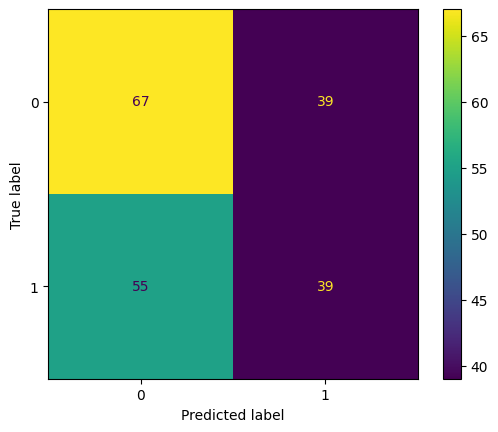

Classifier: Logistic Regression
Training set accuracy:  0.667
Test set accuracy:  0.530
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.63      0.59       106
           1       0.50      0.41      0.45        94

    accuracy                           0.53       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.53      0.53      0.52       200



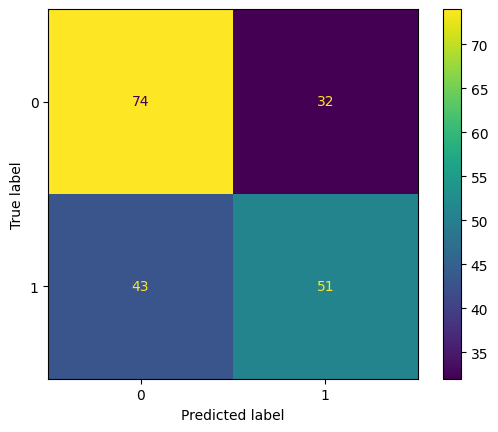

Classifier: Support Vector Classifier
Training set accuracy:  0.744
Test set accuracy:  0.625
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.70      0.66       106
           1       0.61      0.54      0.58        94

    accuracy                           0.62       200
   macro avg       0.62      0.62      0.62       200
weighted avg       0.62      0.62      0.62       200



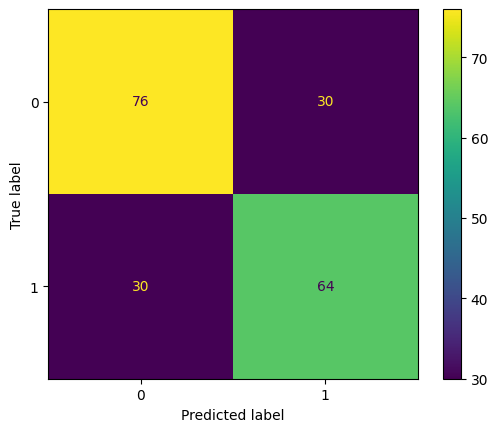

Classifier: Random Forest
Training set accuracy:  0.995
Test set accuracy:  0.700
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       106
           1       0.68      0.68      0.68        94

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.70      0.70      0.70       200



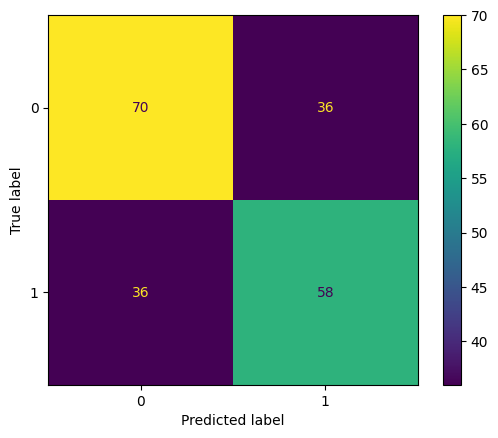

Classifier: Decision Tree
Training set accuracy:  0.995
Test set accuracy:  0.640
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       106
           1       0.62      0.62      0.62        94

    accuracy                           0.64       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.64      0.64      0.64       200



In [32]:
# Import additional classifiers
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# List of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
}

# Loop through each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(x_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(x_test)
    
    # Calculate accuracy
    score1 = clf.score(x_train, y_train)
    score2 = clf.score(x_test, y_test)
    
    # Generate classification report
    report = classification_report(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm)

    disp.plot()
    plt.show()
    
    # Print classifier name, accuracy, and classification report
    print(f"Classifier: {name}")
    print("Training set accuracy: ", '%.3f'%(score1))
    print("Test set accuracy: ", '%.3f'%(score2))
    print(f"Classification Report:\n{report}")
    print("="*60)


Random Forest 72% test accuracy 